In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [3]:
df.isnull().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

In [6]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [7]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [8]:
df.tail(10)

,product,narrative
162411,retail_banking,zelle suspended account without cause banking ...
162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,debt_collection,zuntafi sent notice willing settle defaulted s...
162415,debt_collection,name
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name
162420,credit_reporting,name


In [9]:
df = df.iloc[:-6 , :]

<AxesSubplot:>

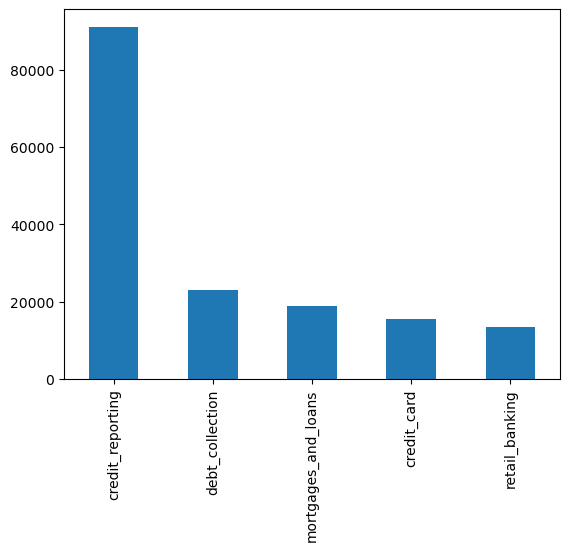

In [10]:
df['product'].value_counts().plot(kind='bar')

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)
df['narrative'] = df['narrative'].apply(preprocess)

In [12]:
df['narrative']

0         purchas order day ship amount receiv product w...
1         forward messag date tue subject pleas investig...
2         forward messag cc sent friday pdt subject fina...
3         payment histori miss credit report special loa...
4         payment histori miss credit report made mistak...
                                ...                        
162410    zale comen bank close sold account report acco...
162411    zell suspend account without caus bank wont le...
162412    zero contact made debt supposedli resolv found...
162413    zillow home loan nml nml actual quot provid qu...
162414    zuntafi sent notic will settl default student ...
Name: narrative, Length: 162405, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()
X=tf_idf.fit_transform(df['narrative'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [15]:
y=df['product']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [25]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred_DTC=DTC.predict(X_test)
y_pred_DTC

array(['credit_reporting', 'mortgages_and_loans', 'credit_reporting', ...,
       'credit_card', 'mortgages_and_loans', 'credit_card'], dtype=object)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_DTC))

                     precision    recall  f1-score   support

        credit_card       0.67      0.64      0.66      4729
   credit_reporting       0.88      0.92      0.90     27285
    debt_collection       0.72      0.67      0.69      7012
mortgages_and_loans       0.77      0.70      0.74      5713
     retail_banking       0.73      0.74      0.73      3983

           accuracy                           0.82     48722
          macro avg       0.75      0.74      0.74     48722
       weighted avg       0.81      0.82      0.82     48722



In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred_RFC=RFC.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred_RFC))

                     precision    recall  f1-score   support

        credit_card       0.82      0.67      0.74      4729
   credit_reporting       0.87      0.98      0.92     27285
    debt_collection       0.90      0.66      0.76      7012
mortgages_and_loans       0.86      0.79      0.83      5713
     retail_banking       0.84      0.82      0.83      3983

           accuracy                           0.87     48722
          macro avg       0.86      0.78      0.82     48722
       weighted avg       0.87      0.87      0.86     48722



In [30]:
from sklearn.svm import LinearSVC
LVC=LinearSVC()
LVC.fit(X_train,y_train)
y_pred_LVC=LVC.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred_LVC))

                     precision    recall  f1-score   support

        credit_card       0.78      0.77      0.77      4729
   credit_reporting       0.91      0.93      0.92     27285
    debt_collection       0.80      0.73      0.76      7012
mortgages_and_loans       0.85      0.82      0.84      5713
     retail_banking       0.85      0.86      0.86      3983

           accuracy                           0.87     48722
          macro avg       0.84      0.82      0.83     48722
       weighted avg       0.87      0.87      0.87     48722

